In [1]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import pandas as pd
from sklearn.preprocessing import normalize
import glob

In [2]:
folder = "/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/"
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_0_1.txt'))
data0 = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [3]:
filenames

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_0_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_0_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_0_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_0_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_0_1.txt']

In [4]:
N = np.array([1e3, 1e4, 1e5, 1e6, 1e7])

In [5]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#7b556c']

In [6]:
rc(r'text', usetex=True)

In [7]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
titles = [r'$k_{min}$ = 1, $\lambda$ = 17.51, $\gamma$ = 2.5', 
          r'$k_{min}$ = 1, $\lambda$ = 5.51, $\gamma$ = 3.0',
          r'$k_{min}$ = 1, $\lambda$ = 3.34, $\gamma$ = 3.5',
          r'$k_{min}$ = 1, $\lambda$ = 2.6, $\gamma$ = 4.0',
          r'$k_{min}$ = 1, $\lambda$ = 2.23, $\gamma$ = 4.5']

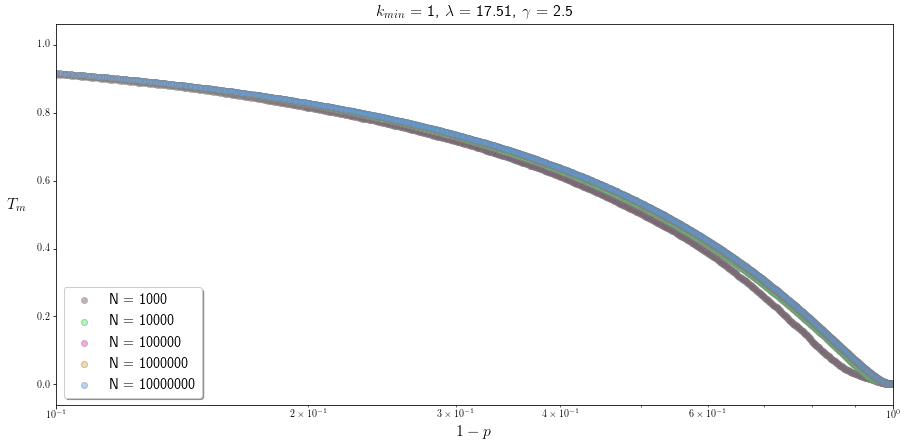

In [8]:
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data0:
    axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - i], label=r'N = %.0f' %N[i], alpha=0.45)
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    i += 1
    plt.title(titles[0], fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_0_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [9]:
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_1_1.txt'))
data1 = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [10]:
filenames

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_1_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_1_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_1_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_1_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_1_1.txt']

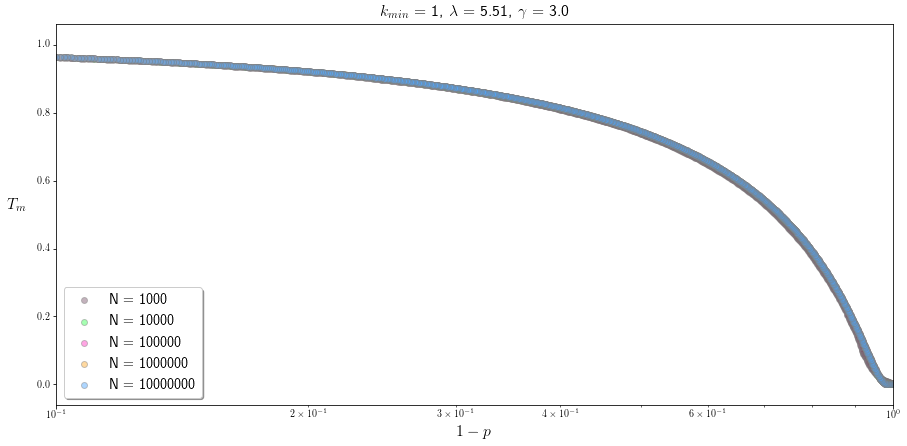

In [11]:
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data1:
    axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - i], label=r'N = %.0f' %N[i], alpha=0.45)
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    i += 1
    plt.title(titles[1], fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_1_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [12]:
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_2_1.txt'))
data2 = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [13]:
filenames

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_2_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_2_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_2_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_2_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_2_1.txt']

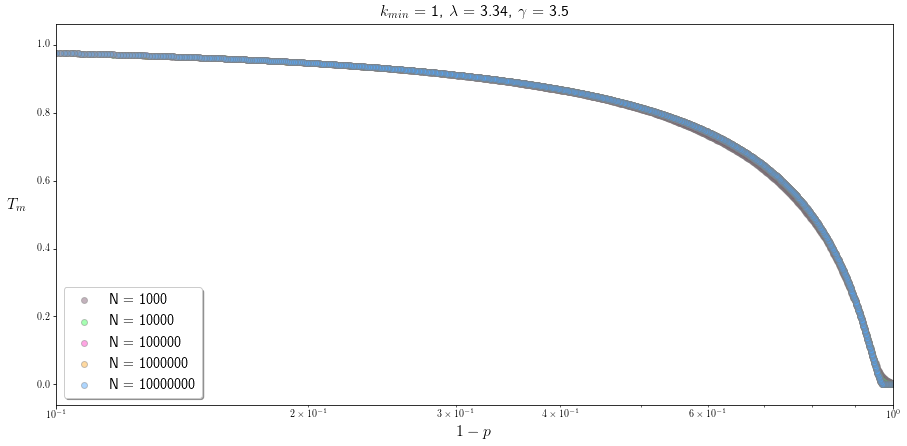

In [14]:
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data2:
    axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - i], label=r'N = %.0f' %N[i], alpha=0.45)
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    i += 1
    plt.title(titles[2], fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_2_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [15]:
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_4_1.txt'))
data3 = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [16]:
filenames

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_4_1.txt']

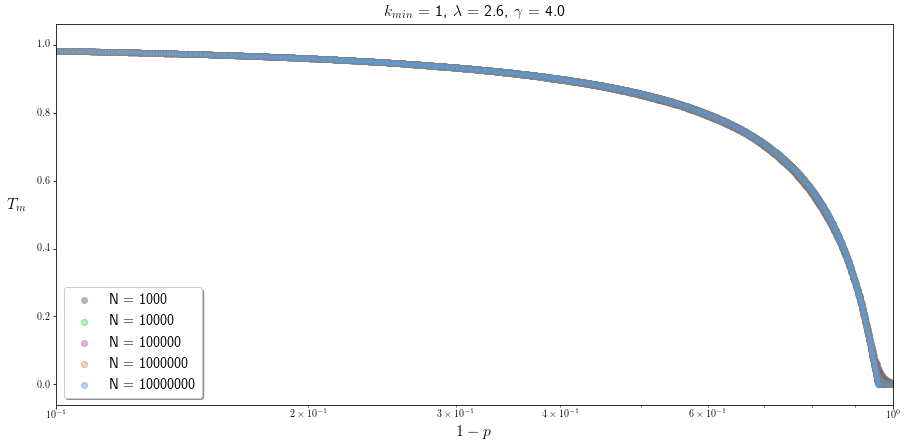

In [17]:
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data3:
    axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - i], label=r'N = %.0f' %N[i], alpha=0.45)
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    i += 1
    plt.title(titles[3], fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_3_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [18]:
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_4_1.txt'))
data4 = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [19]:
filenames

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_4_1.txt',
 '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_4_1.txt']

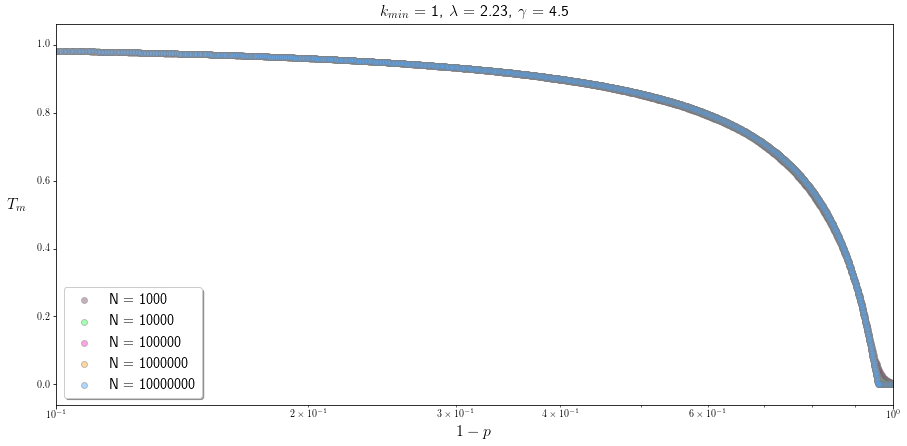

In [20]:
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data4:
    axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - i], label=r'N = %.0f' %N[i], alpha=0.45)
#     axs.plot(1-d.T[0][:-1], d.T[1][:-1], color=c[i], label=r'N = %.0f' %N[i], lw=4, alpha=0.8)

    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    i += 1
    plt.title(titles[4], fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_4_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [21]:
def plot_graph(data):
    fig, axs = plt.subplots(figsize=(15, 7))
    i = 0
    for datum in data:
        axs.plot(1-datum[4].T[0][:-1], datum[4].T[1][:-1], color=c[i], label=titles[i], lw=1, alpha=0.8)
        for d in datum:
            axs.plot(1-d.T[0][:-1], d.T[1][:-1], color=c[i], lw=1, alpha=0.8)

        i += 1
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.title( 'Overlaped curves', fontdict=font)
    plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

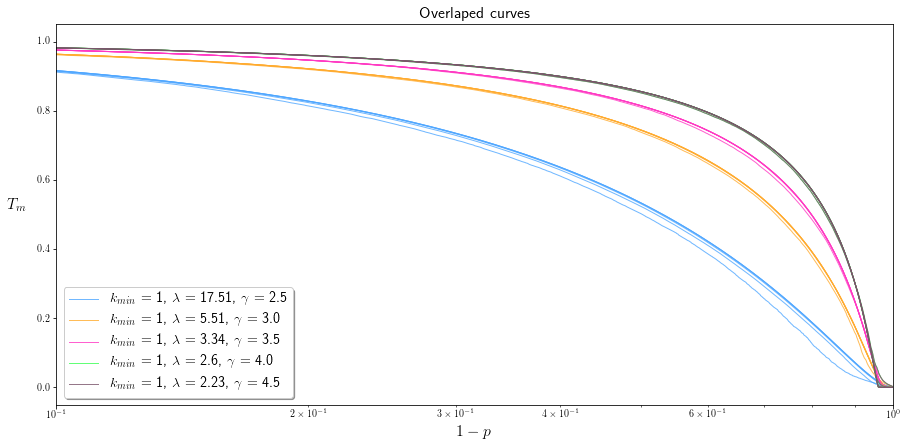

In [22]:
data = [data0, data1, data2, data3, data4]
plot_graph(data)

In [23]:
pc4 = []
for d in data4:
    pc4.append(d.T[0][-1])

No handles with labels found to put in legend.


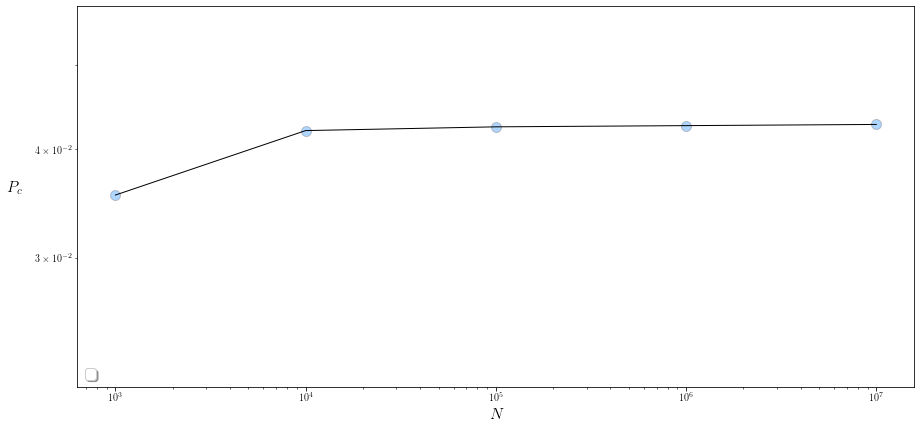

In [24]:
fig, axs = plt.subplots(figsize=(15, 7))
axs.scatter(N, pc4, color="gray", facecolors=c[0], alpha=0.45, s=100)
axs.plot(N, pc4, color='black', lw=1)
axs.legend(loc='lower left', shadow=True, fontsize='x-large')
plt.ylabel('$P_c$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
plt.yscale('log')
plt.xscale('log')
    # plt.title('$\lambda$ = $f(\mathbb{E}[X$ ~ Zipf$(\gamma = 2.5)])$', fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/pcXN.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')